In [1]:
import tensorflow as tf
import keras
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [2]:
X_train.shape

(60000, 28, 28)

In [3]:
y_train=keras.utils.to_categorical(y_train,num_classes=10)
y_test=keras.utils.to_categorical(y_test,num_classes=10)


In [4]:
input_width=28
input_height=28
input_channels=1

cn1_units=32
cn1_filter_k=5
cn1_stride=1
max_pool1_k=2

cn2_units=64
cn2_filter_k=5
cn2_stride=1
max_pool2_k=2



dense_layer_units=1024
output_layer_units=10


In [5]:
weights={'wc1':tf.Variable(tf.random.normal([cn1_filter_k,cn1_filter_k,input_channels,cn1_units])),
        'wc2':tf.Variable(tf.random.normal([cn2_filter_k,cn2_filter_k,cn1_units,cn2_units])),
        'wdl1':tf.Variable(tf.random.normal([input_width//(max_pool1_k*max_pool2_k)*input_height//(max_pool1_k*max_pool2_k)*cn2_units,dense_layer_units])),
         'wol':tf.Variable(tf.random.normal([dense_layer_units,output_layer_units]))
                           }
biases={'bc1':tf.Variable(tf.random.normal([cn1_units])),
       'bc2':tf.Variable(tf.random.normal([cn2_units])),
       'bdl':tf.Variable(tf.random.normal([dense_layer_units])),
       'bol':tf.Variable(tf.random.normal([output_layer_units]))}

## Using keras on MNIST Dataset:

In [6]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [26]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train =x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print("x_train shape:", x_train.shape,',x_test shape:',x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1) ,x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),#mention drop probabilty
        layers.Dense(1024,activation='relu'),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [10]:
batch_size = 100
epochs = 25

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/25
540/540 [==============================] - 18s 33ms/step - loss: 0.1622 - accuracy: 0.9499 - val_loss: 0.0513 - val_accuracy: 0.9850
Epoch 2/25
540/540 [==============================] - 20s 36ms/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0423 - val_accuracy: 0.9885
Epoch 3/25
540/540 [==============================] - 18s 34ms/step - loss: 0.0331 - accuracy: 0.9897 - val_loss: 0.0404 - val_accuracy: 0.9892
Epoch 4/25
540/540 [==============================] - 18s 34ms/step - loss: 0.0272 - accuracy: 0.9907 - val_loss: 0.0288 - val_accuracy: 0.9917
Epoch 5/25
540/540 [==============================] - 18s 33ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.0315 - val_accuracy: 0.9927
Epoch 6/25
540/540 [==============================] - 19s 35ms/step - loss: 0.0175 - accuracy: 0.9941 - val_loss: 0.0297 - val_accuracy: 0.9923
Epoch 7/25
540/540 [==============================] - 21s 38ms/step - loss: 0.0144 - accuracy: 0.9951 - val_loss: 0.0341 - val_accuracy:

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1] * 100, '%')

Test loss: 0.034853022545576096
Test accuracy: 99.26999807357788 %


In [15]:
import pandas as pd
history=pd.DataFrame(history.history)
history

,loss,accuracy,val_loss,val_accuracy
0,0.162162,0.949944,0.051330,0.985000
1,0.051698,0.983481,0.042281,0.988500
2,0.033140,0.989741,0.040397,0.989167
3,0.027203,0.990741,0.028818,0.991667
4,0.021482,0.992593,0.031456,0.992667
5,0.017471,0.994130,0.029663,0.992333
6,0.014405,0.995111,0.034135,0.992000
7,0.012314,0.995815,0.033140,0.992000
8,0.009871,0.996815,0.039255,0.991833
9,0.009925,0.996648,0.036509,0.992000


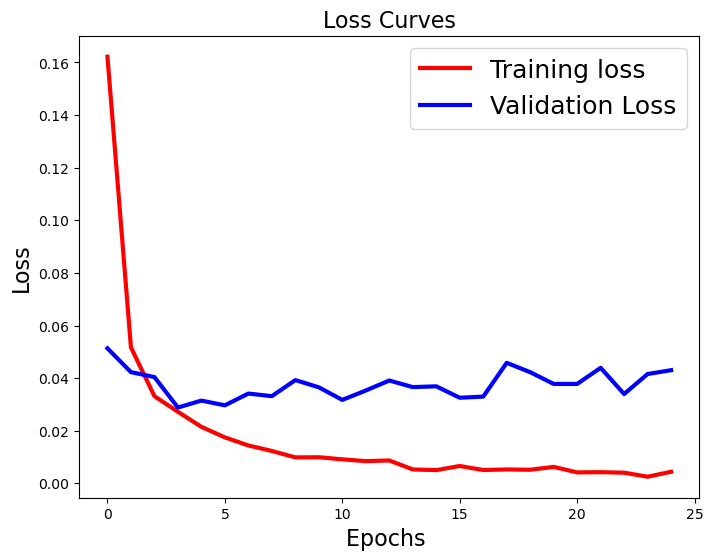

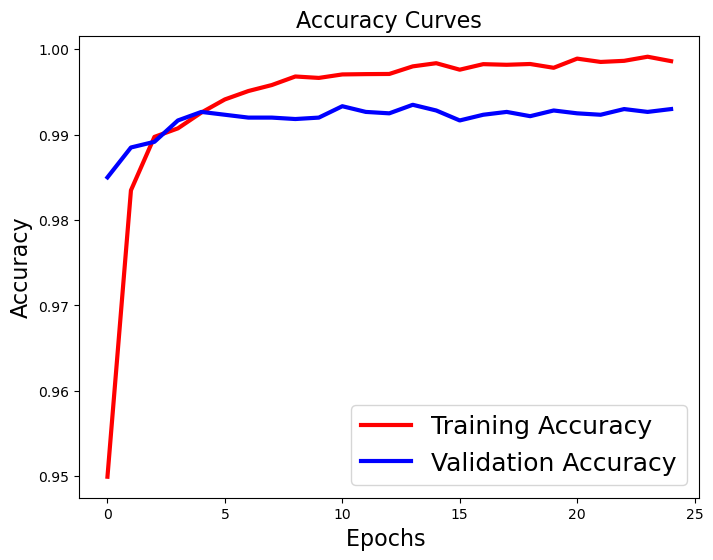

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])
plt.plot(history['loss'],'r',linewidth=3.0)
plt.plot(history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history['accuracy'],'r',linewidth=3.0)
plt.plot(history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)

plt.title('Accuracy Curves',fontsize=16)
plt.show()